# Solar Sail Simulation

Simulation of solar sail trajectories under Prof. Pister at the University of California: Berkeley for the Berkeley Low-cost Interplanetary Solar Sail (BLISS) project.

## Getting Started

Before running this notebook, please install `conda` as a python environment manager. If you're at this point, I'll assume you also have `jupyter lab` and/or  `jupyter notebook` installed.

To get the appropriate packages to run this notebook started, please first install a new conda environment through the configuration YAML in the repository. Use the following command while in the repository directory:

```
conda env create -f environment.yml
```

This will install the following dependancies into your a new conda environment called `solar-sail-sim`:

- numpy
- ipykernel
- matplotlib
- scipy

To create a Python kernel for Jupyter to get access to, run the following command:

```
ipython kernel install --user --name=solar-sail-sim
```

Now you're all set!

## Contribution Guidelines

Make sure to commit regularly, and please make sure to **export a new YAML configuration file if you install new packages** to the python environment.

To install new python packages to the environment, please use use the following:

```
conda install -n solar-sail-sim <PACKAGE NAME>
```

To update the YAML configuration file, use the following while in the repository directory AND in the correct conda environment:

```
conda env export > solar-sail-sim.yml
```
## Student Contributers
**Spring 2024 (v0.1)** Marvin Lin, Andrew Ji, Shazaib Lalani, Matthew Cranny, Luke Harris

In [1]:
'''
Basic imports and constant definitions for simulation functions
'''     
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import solve_ivp

import functions.body as body
import functions.utils as utils

mu = 1.327e20 /1e9 # mu in km^3/s^2, sun's gravitational parameter
AU = 1.496e11 /1e3  # astronomical unit in km, distance from sun to earth
beta = 0.15 # ratio of peak solar sail force to sun's gravity

In [5]:
'''
Function definitions for various trajectory simulations

s = [x, y, vx, vy]
F returns s_dot = [vx, vy, ax, ay]
r = [x, y]
a = -mu/|r|**2 r_hat = -mu/|r|**3 [x,y]
'''
def Fsun(t,s):
    rcubed = (s[0]**2+s[1]**2)**(3/2)
    ax = -mu*s[0]/rcubed
    ay = -mu*s[1]/rcubed
    return [s[2], s[3], ax, ay]

def Fsail(t,s,cone):
    rsquared = s[0]**2 + s[1]**2
    rcubed = (rsquared)**(3/2)
    asunx = -mu*s[0]/rcubed
    asuny = -mu*s[1]/rcubed
    theta = math.atan2(s[1],s[0])
    asail = beta*mu/rsquared*math.cos(cone)**2
    asailx = asail*math.cos(theta+cone)
    asaily = asail*math.sin(theta+cone)
    return [s[2], s[3], asunx+asailx, asuny+asaily]

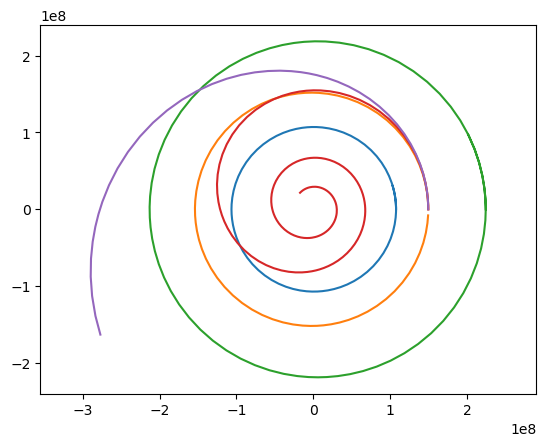

In [6]:
venus = solve_ivp(Fsun, [0, 2e7], [0.72*AU, 0, 0, 35], rtol=1e-8)
earth = solve_ivp(Fsun, [0, 3.2e7], [AU, 0, 0, 30], rtol=1e-8)
mars = solve_ivp(Fsun, [0, 6e7], [1.5*AU, 0, 0, 24], rtol=1e-8)


sail_in = solve_ivp(Fsail, [0, 3.2e7], [AU, 0, 0, 30], rtol=1e-8, args=[-0.6])
sail_out = solve_ivp(Fsail, [0, 3.2e7], [AU, 0, 0, 30], rtol=1e-8, args=[0.6])

plt.plot(venus.y[0], venus.y[1])
plt.plot(earth.y[0], earth.y[1])
plt.plot(mars.y[0], mars.y[1])
plt.axis('equal')
plt.plot(sail_in.y[0], sail_in.y[1])
plt.plot(sail_out.y[0], sail_out.y[1])

plt.show()

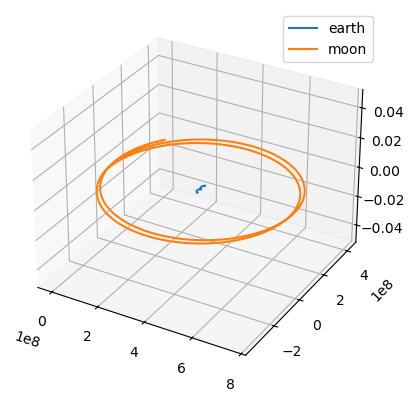

In [8]:
b1 = body.Body("earth", np.array([384400000,0,0]), np.array([0,0,0]), np.array([0,0,0]), 5.97219E+24)
b2 = body.Body("moon", np.array([0,0,0]), np.array([0,1023,0]), np.array([0,0,0]), 7.36E+22)

utils.integrate(np.array([b1, b2]), 5000000, 10000)

utils.plotbodies(np.array([b1, b2]))

In [4]:
import stateCollection.spiceInterface as spice
import numpy as np

spice.createEmptySave()
saveFile = './data/save.npy'
existingSPK = np.load(saveFile)
print(existingSPK)

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '199' '299' '301' '399']


wrote SPK content to ./data/20000001.bsp
['Jan 1, 2000', 'Oct 11, 2002']


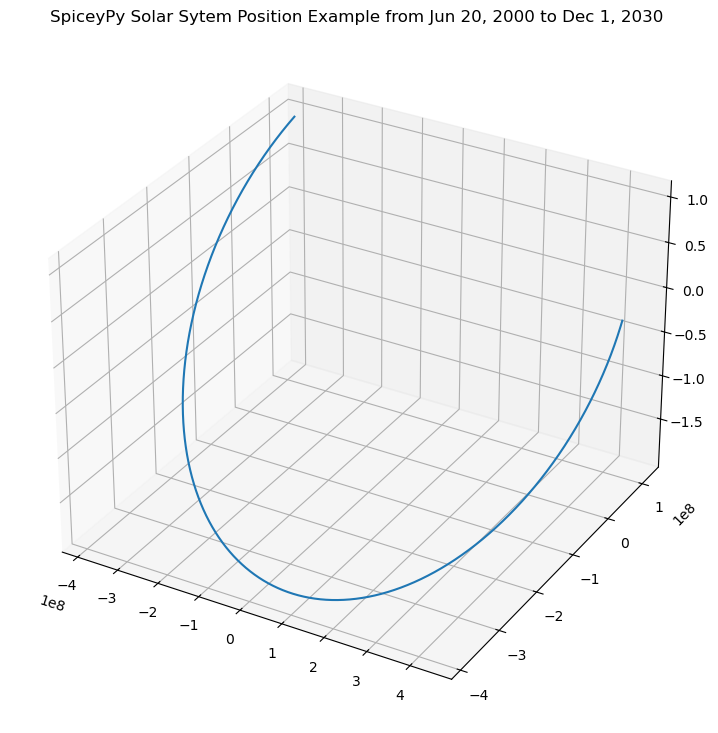

In [2]:
import stateCollection.spiceInterface as spice

timeObj = spice.Time(1, 1, 2000, 1000)

mercury_pos, mercury_vel = spice.requestData('20000001', timeObj, 5)

fig = plt.figure(figsize=(9, 9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(mercury_pos[0], mercury_pos[1], mercury_pos[2], label = 'Mercury')
plt.title('SpiceyPy Solar Sytem Position Example from Jun 20, 2000 to Dec 1, 2030')
plt.show()

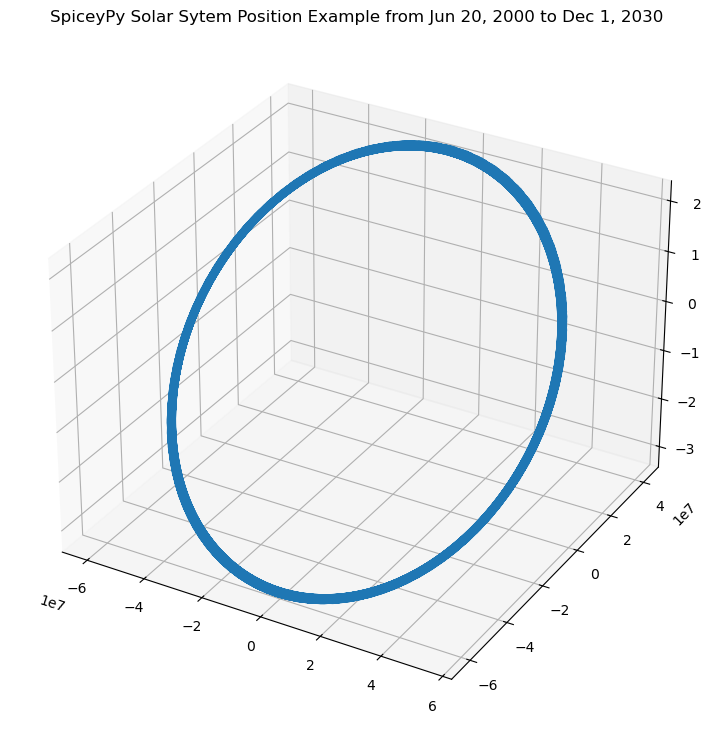

In [15]:
import spiceypy as spice
step = 4000

spice.furnsh("./data/metaKernel.txt")

utc = ['Jun 20, 2000', 'Dec 1, 2030']
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])

times = [x*(etTwo-etOne)/step + etOne for x in range(step)]

mercury_pos, mercury_vel = spice.spkpos('1', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')

mercury_pos = mercury_pos.T
fig = plt.figure(figsize=(9, 9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(mercury_pos[0], mercury_pos[1], mercury_pos[2], label = 'Mercury')
plt.title('SpiceyPy Solar Sytem Position Example from Jun 20, 2000 to Dec 1, 2030')
plt.show()

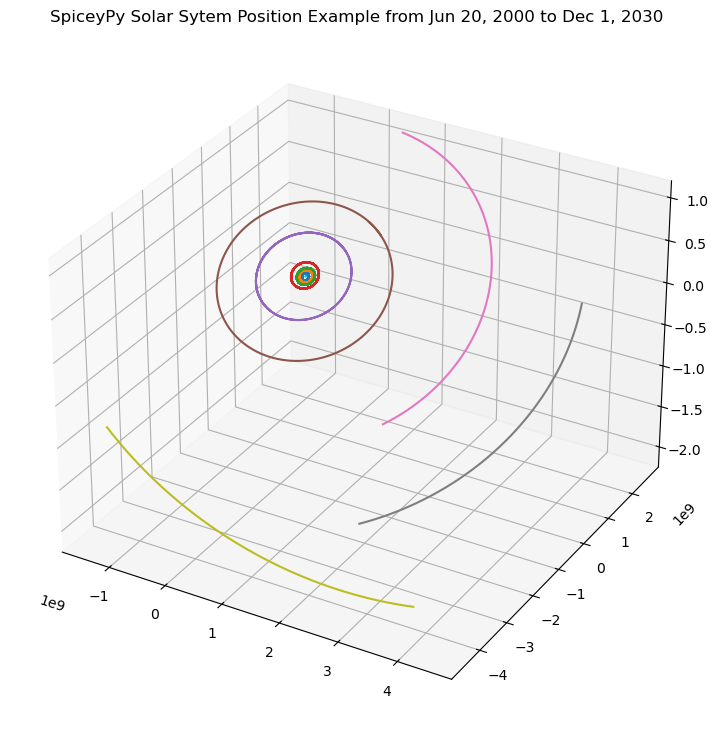

In [38]:
import spiceypy as spice
step = 4000

spice.furnsh("./data/metaKernel.txt")

utc = ['Jun 20, 2000', 'Dec 1, 2030']
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])

times = [x*(etTwo-etOne)/step + etOne for x in range(step)]

mercury_pos, murcury_vel = spice.spkpos('1', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
venus_pos, venus_vel = spice.spkpos('2', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
earth_pos, earth_vel = spice.spkpos('3', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
mars_pos, mars_vel = spice.spkpos('4', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
jupiter_pos, jupiter_vel = spice.spkpos('5', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
saturn_pos, saturn_vel = spice.spkpos('6', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
uranus_pos, uranus_vel = spice.spkpos('7', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
neptune_pos, neptune_vel = spice.spkpos('8', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
pluto_pos, pluto_vel = spice.spkpos('9', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')
sun_pos, sun_vel = spice.spkpos('10', times, 'J2000', 'NONE', 'SOLAR SYSTEM BARYCENTER')

# positions is shaped (4000, 3), let's transpose to (3, 4000) for easier indexing
mercury_pos = mercury_pos.T
venus_pos = venus_pos.T
earth_pos = earth_pos.T
mars_pos = mars_pos.T
jupiter_pos = jupiter_pos.T
saturn_pos = saturn_pos.T
uranus_pos = uranus_pos.T
neptune_pos = neptune_pos.T
pluto_pos = pluto_pos.T
sun_pos = sun_pos.T

fig = plt.figure(figsize=(9, 9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(mercury_pos[0], mercury_pos[1], mercury_pos[2], label = 'Mercury')
ax.plot(venus_pos[0], venus_pos[1], venus_pos[2], label = 'Venus')
ax.plot(earth_pos[0], earth_pos[1], earth_pos[2], label = 'Earth')
ax.plot(mars_pos[0], mars_pos[1], mars_pos[2], label = 'Mars')
ax.plot(jupiter_pos[0], jupiter_pos[1], jupiter_pos[2], label = 'Jupiter')
ax.plot(saturn_pos[0], saturn_pos[1], saturn_pos[2], label = 'Saturn')
ax.plot(uranus_pos[0], uranus_pos[1], uranus_pos[2], label = 'Uranus')
ax.plot(neptune_pos[0], neptune_pos[1], neptune_pos[2], label = 'Neptune')
ax.plot(pluto_pos[0], pluto_pos[1], pluto_pos[2], label = 'Pluto')
ax.plot(sun_pos[0], sun_pos[1], sun_pos[2], label = 'Sun')
plt.title('SpiceyPy Solar Sytem Position Example from Jun 20, 2000 to Dec 1, 2030')
plt.show()